# 12. Exploratory Analysis & Linear Regression


## 12.1 Load ML Features Dataset


In [36]:
import pandas as pd

feature_dataset_path = r"C:\Users\pc\data science\SADOP\data\ml_features.csv"
df = pd.read_csv(feature_dataset_path)
df.head()


,query,query_time,rows_returned,has_sum,has_group_by,has_where,tables_count,query_length,cpu_usage,memory_usage,is_slow
0,SELECT AVG(total_amount)\nFROM (\n SELECT S...,0.641623,1,1,1,0,2,176,0.0,0.746455,0
1,"SELECT u.user_id, t.transaction_date, t.amount...",1.644557,250000,0,0,0,3,183,12.5,1.108117,1
2,SELECT AVG(total_amount)\nFROM (\n SELECT S...,0.650696,1,1,1,0,2,176,0.0,0.763426,0
3,"SELECT u.user_id, COUNT(t.transaction_id) AS t...",0.620023,16520,0,1,1,3,198,0.0,0.764052,0
4,SELECT DISTINCT u.user_id\nFROM user u\nJOIN a...,0.347722,16329,0,0,1,3,150,0.0,0.768193,0


## 12.2 Quick Summary Statistics


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
query_time,20000.0,2.460381,128.639992,0.000000,0.099602,0.574728,0.846677,18149.735816
rows_returned,20000.0,42186.366850,75246.922883,0.000000,3052.000000,16520.000000,25143.000000,250000.000000
has_sum,20000.0,0.247550,0.431600,0.000000,0.000000,0.000000,0.000000,1.000000
has_group_by,20000.0,0.370650,0.482991,0.000000,0.000000,0.000000,1.000000,1.000000
has_where,20000.0,0.562200,0.496128,0.000000,0.000000,1.000000,1.000000,1.000000
tables_count,20000.0,2.254600,0.908251,1.000000,1.000000,2.000000,3.000000,4.000000
query_length,20000.0,157.014750,54.007287,45.000000,148.000000,181.000000,196.000000,225.000000
cpu_usage,20000.0,7.918920,16.800883,0.000000,0.000000,0.000000,12.500000,100.000000
memory_usage,20000.0,1.385129,0.104171,0.746455,1.345806,1.401846,1.462074,1.917593
is_slow,20000.0,0.410000,0.491846,0.000000,0.000000,0.000000,1.000000,1.000000


## 2.3 import numpy as np



In [38]:
import numpy as np

print("Missing values:")
print(df.isna().sum())


Missing values:
query            0
query_time       0
rows_returned    0
has_sum          0
has_group_by     0
has_where        0
tables_count     0
query_length     0
cpu_usage        0
memory_usage     0
is_slow          0
dtype: int64


## 2.4 Visualize Feature Distributions


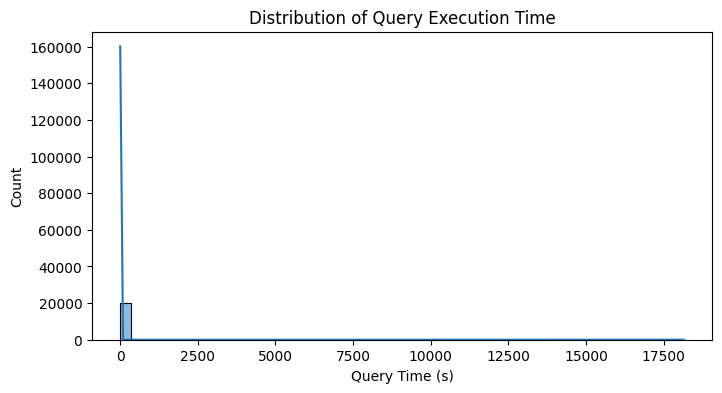

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of query_time
plt.figure(figsize=(8,4))
sns.histplot(df['query_time'], bins=50, kde=True)
plt.title('Distribution of Query Execution Time')
plt.xlabel('Query Time (s)')
plt.ylabel('Count')
plt.show()


## 2.5 Log-Scale Visualization

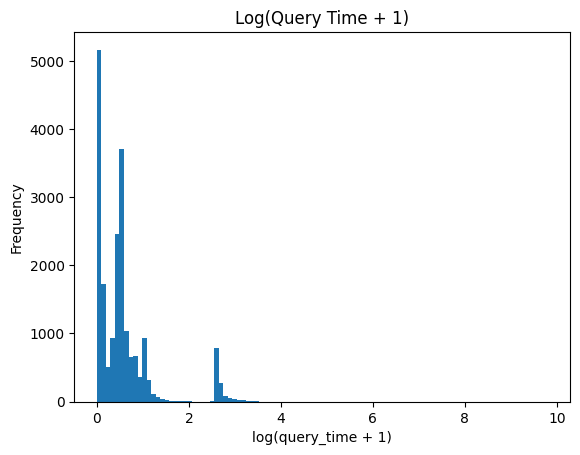

In [40]:

plt.figure()
plt.hist(np.log1p(df["query_time"]), bins=100)
plt.title("Log(Query Time + 1)")
plt.xlabel("log(query_time + 1)")
plt.ylabel("Frequency")
plt.show()

## 2.6 Feature Distributions

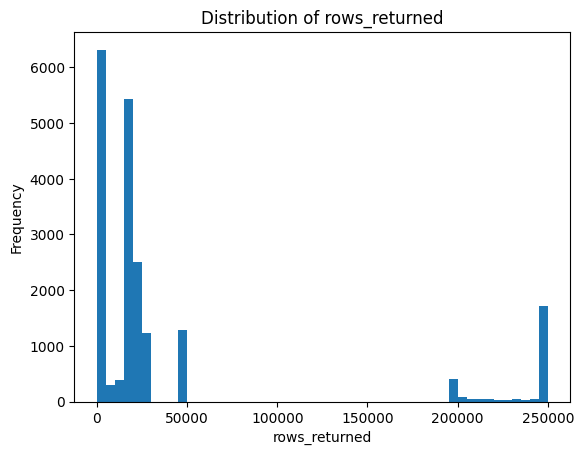

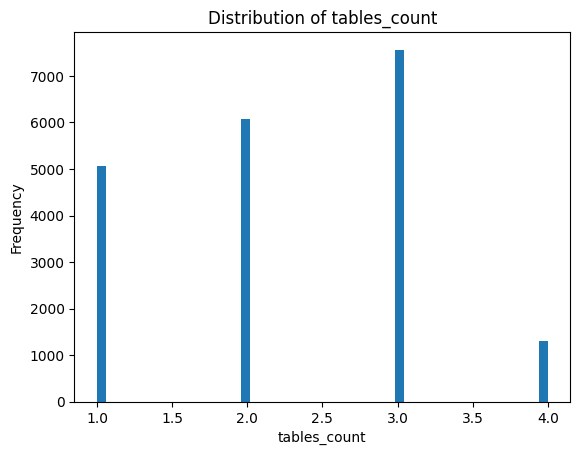

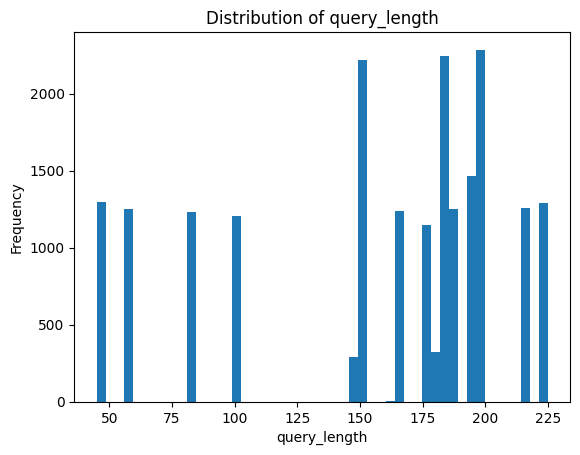

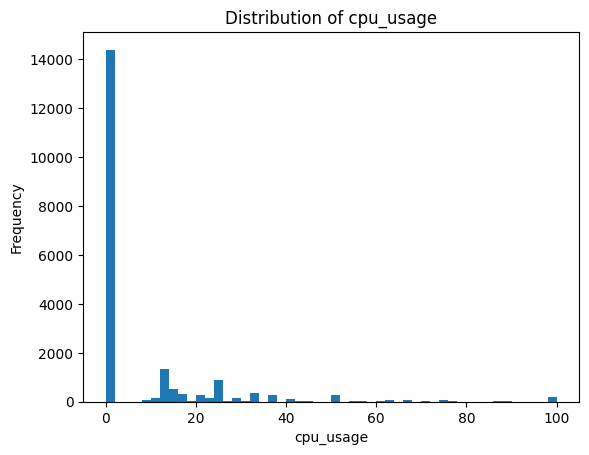

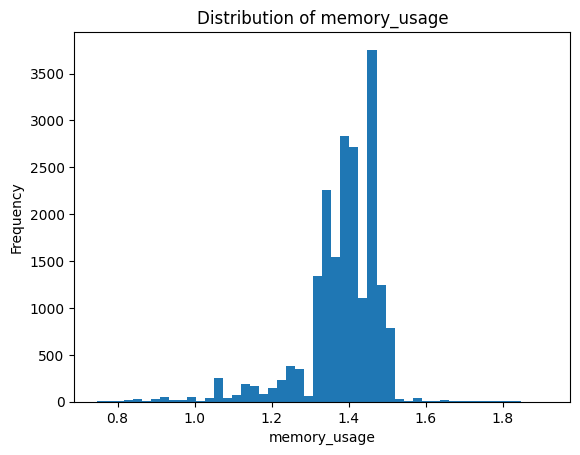

In [41]:
features = [
    "rows_returned",
    "tables_count",
    "query_length",
    "cpu_usage",
    "memory_usage"
]

for col in features:
    plt.figure()
    plt.hist(df[col], bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 2.7 Correlation Matrix & Analysis

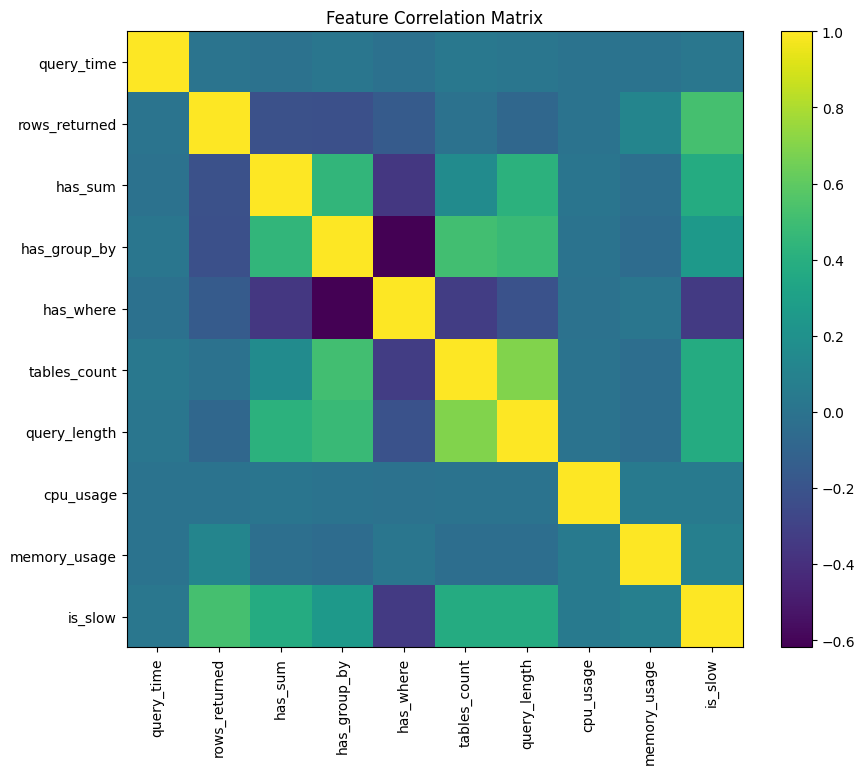

In [42]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Feature Correlation Matrix")
plt.show()

## 2.6 Linear Regression: Predict query_time


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features (numeric only)
X = df[['rows_returned', 'tables_count', 'query_length',
        'has_sum', 'has_group_by', 'has_where',
        'cpu_usage', 'memory_usage']]
y = df['query_time']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2:.3f}')

# Coefficients
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
coef_df.sort_values(by='coefficient', ascending=False)


R² score: 0.013


,feature,coefficient
1,tables_count,2.622959e+00
4,has_group_by,2.063518e+00
7,memory_usage,6.237806e-01
2,query_length,2.870489e-02
0,rows_returned,-1.075236e-07
6,cpu_usage,-1.818171e-02
5,has_where,-3.926477e+00
3,has_sum,-7.517165e+00
